In [1]:
import numpy as np
import control as ct
import matplotlib.pyplot as plt
from scipy import integrate, linalg

In [37]:
#system definition
def xdot(A,B1,B2,x,w,u,t):
    return A.dot(x) + B1.dot(w) + B2.dot(u) #state
def z(C,D1,D2,x,w,u,t):
    return C.dot(x) + D1.dot(w) + D2.dot(u) #output

In [20]:
x0 = [np.random.rand(),np.random.rand()]
print(x0)
w = 1
u = 1
A = np.array([[0,1],[-1,0]])
C = np.array([[1,0]])
B1,B2 = np.array([0,1]).T,np.array([0,1]).T
print(B1.dot(w))
np.shape(A)

[0.17370412429304416, 0.5657244068255192]
[0 1]


(2, 2)

In [26]:
x = xdot(A,B1,B2,x0,w,u)
print(x)
print(np.squeeze(np.asarray(x)))

[0.56572441 1.82629588]
[0.56572441 1.82629588]


In [ ]:
x_t = integrate.solve_ivp(xdot, [0,10], x0, t_eval = np.linspace(0,10,100),args = (A,B1,B2,w,u),vectorized=True)
print(len(x_t.y))


In [6]:
#lets play with integrating a normal 1D system to see what we are doing wrong: 
def xdot1d(t,x,a,u):
    return -a*x + u

#initialize random x0: 
#x01d = np.random.rand()
x01d = [7]
print(x01d)

[7]


In [8]:
a, u = 1, 3 #initializing parameters
xsol = integrate.solve_ivp(xdot1d,[0,10],x01d,t_eval=np.linspace(0,10,1000),args=(a,u))
xsol

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 50
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([ 0.        ,  0.01001001,  0.02002002,  0.03003003,  0.04004004,
        0.05005005,  0.06006006,  0.07007007,  0.08008008,  0.09009009,
        0.1001001 ,  0.11011011,  0.12012012,  0.13013013,  0.14014014,
        0.15015015,  0.16016016,  0.17017017,  0.18018018,  0.19019019,
        0.2002002 ,  0.21021021,  0.22022022,  0.23023023,  0.24024024,
        0.25025025,  0.26026026,  0.27027027,  0.28028028,  0.29029029,
        0.3003003 ,  0.31031031,  0.32032032,  0.33033033,  0.34034034,
        0.35035035,  0.36036036,  0.37037037,  0.38038038,  0.39039039,
        0.4004004 ,  0.41041041,  0.42042042,  0.43043043,  0.44044044,
        0.45045045,  0.46046046,  0.47047047,  0.48048048,  0.49049049,
        0.5005005 ,  0.51051051,  0.52052052,  0.53053053,  0.54054054,
        0.55055055,  0.5605605

10.0
[7.         6.96015969 6.92071619 6.88166555 6.84300386 6.80472724
 6.76683187 6.72931394 6.6921697  6.65539541 6.61898739 6.582942
 6.54725091 6.51190221 6.47689311 6.44222106 6.40788349 6.37387787
 6.34020164 6.30685227 6.27382723 6.24112401 6.20874007 6.17667292
 6.14492006 6.11347898 6.08234721 6.05152226 6.02100165 5.99078292
 5.96086361 5.93124126 5.90191343 5.87287767 5.84413156 5.81567266
 5.78749856 5.75960685 5.73199511 5.70466095 5.67760198 5.65081581
 5.62430006 5.59805236 5.57207034 5.54635165 5.52089394 5.49569485
 5.47075206 5.44606323 5.42162604 5.39743816 5.3734973  5.34980114
 5.32634739 5.30313376 5.28015797 5.25741773 5.23491079 5.21263487
 5.19058772 5.16876709 5.14717074 5.12579644 5.10464195 5.08370506
 5.06298354 5.0424752  5.02217782 5.00208922 4.98220721 4.9625296
 4.94305422 4.92377891 4.90470151 4.88581985 4.8671318  4.84863521
 4.83032796 4.81220791 4.79427294 4.77652095 4.75894983 4.74155747
 4.72434179 4.70730071 4.69043213 4.67373399 4.65720423 4.64

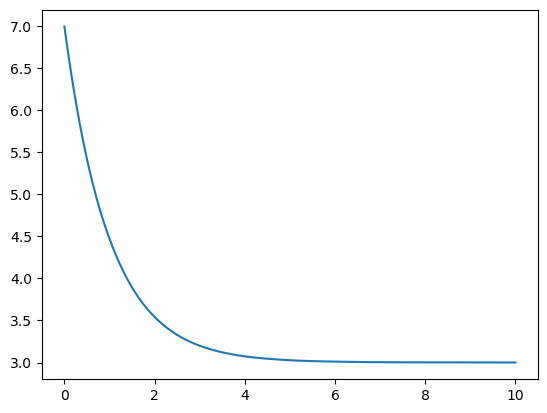

In [16]:
print(xsol.t[-1])
print(xsol.y[0])
plt.plot(xsol.t,xsol.y[0])